In [1]:
import importlib
importlib.import_module('mpl_toolkits').__path__

_NamespacePath(['D:\\Anaconda\\envs\\tf1.15\\lib\\site-packages\\mpl_toolkits'])

In [2]:
import importlib
importlib.import_module('mpl_toolkits.mplot3d').Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline

In [4]:
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
sns.set_context('notebook')
sns.set_style('white')

In [5]:
# simple one
def prActise():
    return np.identity(5)

In [6]:
prActise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [7]:
# Linear regression in one variable
# data loading
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

In [8]:
# load data as feature value as x and target value as y
x = np.c_[np.ones(data.shape[0]), data[:,0]]
y = np.c_[data[:,1]]

Text(0, 0.5, 'Profit in $10,000s')

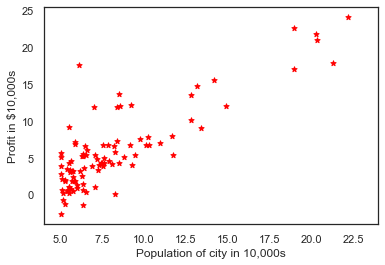

In [9]:
# plotting data
plt.scatter(x[:,1], y, s=30, c='r', marker='*', linewidths=1)
plt.xlim(4, 24)
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')

In [10]:
def computeCost(x, y, theta = [[0], [0]]):
    m = y.size
    j = 0
    h = x.dot(theta)
    
    J = 1 / (2 * m) * np.sum(np.square(h - y))
    return J

In [11]:
computeCost(x,y)

32.072733877455676

In [12]:
# define Gradient descent optimizer
def gradientDescent(x, y, theta = [[0], [0]], alpha = 0.01, num_iters=1500):
    m = y.size
    J_his = np.zeros(num_iters)
    
    for i in np.arange(num_iters):
        h = x.dot(theta)
        theta = theta - alpha * (1 / m) * (x.T.dot(h - y))
        J_his[i] = computeCost(x, y, theta)
        
    return theta, J_his

theta: [-3.63029144  1.16636235]


Text(0.5, 0, 'No of Iterations')

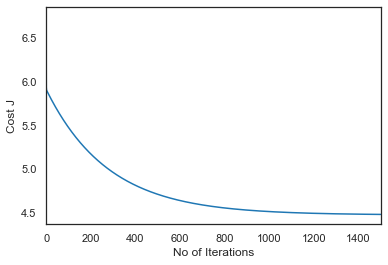

In [13]:
# we run gradient decent for 1500 iters
theta, cost_J = gradientDescent(x, y)
# prit optimized theta value
print("theta:", theta.ravel())
# plot loss function
plt.xlim((0, 1500))
plt.plot(cost_J)
plt.ylabel("Cost J")
plt.xlabel("No of Iterations")

In [14]:
xx = np.arange(5, 23)
yy = theta[0] + theta[1] * xx

print(xx)
print(yy)

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[ 2.20152031  3.36788266  4.53424501  5.70060736  6.86696971  8.03333206
  9.19969441 10.36605676 11.53241911 12.69878147 13.86514382 15.03150617
 16.19786852 17.36423087 18.53059322 19.69695557 20.86331792 22.02968027]


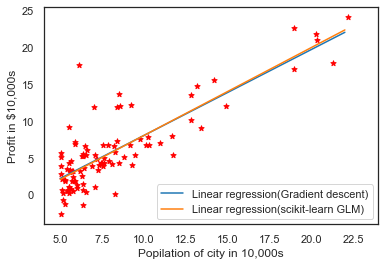

In [15]:
# ploting gradient descent
plt.scatter(x[:,1], y, s=30, c='r', marker='*', linewidths=1)
plt.plot(xx, yy, label='Linear regression(Gradient descent)')

# comparng with scikit-learn Liner regression
regr = LinearRegression()
regr.fit(x[:,1].reshape(-1, 1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression(scikit-learn GLM)')
plt.xlim(4, 24)
plt.xlabel('Popilation of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [16]:
# predict profit for city with population of 35000 and 700000
print(theta.T.dot([1, 3.5]) * 10000)
print(theta.T.dot([1, 7]) * 10000)

[4519.7678677]
[45342.45012945]


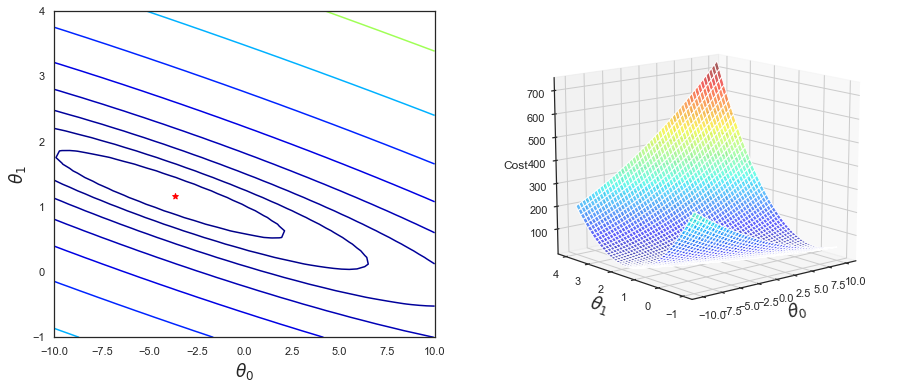

In [17]:
# create grid co-ordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)


xx, yy = np.meshgrid(B0, B1, indexing ='xy')
z = np.zeros((B0.size,B1.size))

# calc z-values (cost) based on grid of co-effi
for (i, j), v in np.ndenumerate(z):
    z[i, j] = computeCost(x, y, theta= [[xx[i, j]], [yy[i, j]]])
    
# plot those values
fig = plt.figure(figsize = (15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# left side plot
CS = ax1.contour(xx, yy, z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r', marker='*')

# right side plot
ax2.plot_surface(xx, yy, z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(z.min(), z.max())
ax2.view_init(elev=15, azim=230)

# common config for both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

In [18]:
print(B0)
print(B1)

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ]
[-1.         -0.89795918 -0.79591837 -0.69387755 -0.59183673 -0.48979592
 -0.3877551  -0.28571429 -0.18367347 -0.08163265  0.02040816  0.12244898
  0.2244898   0.32653061  0.42857143  0.53061224  0.63265306  0.73469388
  0.83673469  0.93877551  1.04081633  1.14285714  1.24489796  1.34693878
  1.44897959  1.55102041  1.65306122  1.7551020

In [19]:
print(xx)
print(yy)
print(z)

[[-10.          -9.59183673  -9.18367347 ...   9.18367347   9.59183673
   10.        ]
 [-10.          -9.59183673  -9.18367347 ...   9.18367347   9.59183673
   10.        ]
 [-10.          -9.59183673  -9.18367347 ...   9.18367347   9.59183673
   10.        ]
 ...
 [-10.          -9.59183673  -9.18367347 ...   9.18367347   9.59183673
   10.        ]
 [-10.          -9.59183673  -9.18367347 ...   9.18367347   9.59183673
   10.        ]
 [-10.          -9.59183673  -9.18367347 ...   9.18367347   9.59183673
   10.        ]]
[[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-0.89795918 -0.89795918 -0.89795918 ... -0.89795918 -0.89795918
  -0.89795918]
 [-0.79591837 -0.79591837 -0.79591837 ... -0.79591837 -0.79591837
  -0.79591837]
 ...
 [ 3.79591837  3.79591837  3.79591837 ...  3.79591837  3.79591837
   3.79591837]
 [ 3.89795918  3.89795918  3.89795918 ...  3.89795918  3.89795918
   3.89795918]
 [ 4.          4.          4.         ...  4.          4.
   4.       

In [20]:
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)

In [21]:
print(z)

[[328.09290555 318.38072048 308.83513266 ...  51.7118358   49.82972153
   48.11420452]
 [305.21764737 295.84531236 286.63957461 ...  44.80953055  43.26726635
   41.8915994 ]
 [283.18999376 274.15750881 265.29162112 ...  38.75482988  37.55241574
   36.51659885]
 ...
 [169.21631028 175.47707815 181.90444327 ... 643.56402853 657.6548672
  671.91230313]
 [186.17846685 192.77908478 199.54629996 ... 676.49913804 690.92982677
  705.52711276]
 [203.98822799 210.92869598 218.03576122 ... 710.28185211 725.05239091
  739.98952696]]


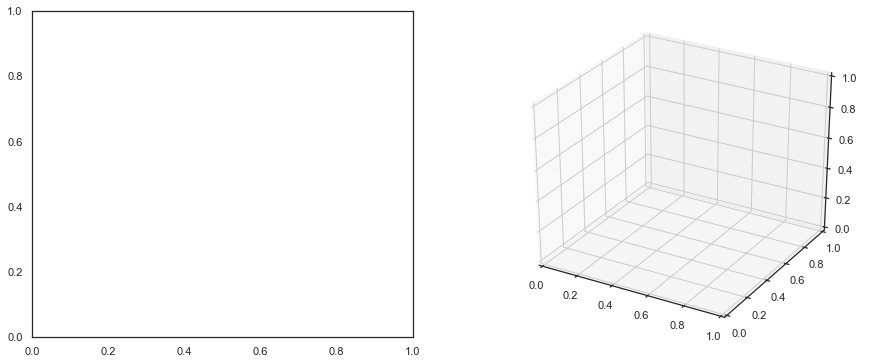

In [22]:
# plot 
fig = plt.figure(figsize = (15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')